# Import Package

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,BatchNormalization,LSTM,Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np

# Read Dataset

In [18]:
df = pd.read_csv("../dataset/spam.csv",encoding='ISO-8859-1')
df = df.drop(["Unnamed: 2",'Unnamed: 3',"Unnamed: 4"],axis = 1)
print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Variable value

In [4]:
x = df["v2"]
y = df["v1"]

# Encoder Label

In [5]:
lebel_encoder = LabelEncoder()
y = lebel_encoder.fit_transform(y)

# Split Train and Test

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.1)

# Tokenizer

In [8]:
max_words = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
seq = tokenizer.texts_to_sequences(x_train)
seq_2 = tokenizer.texts_to_sequences(x_test)


# Padding Sequences

In [9]:
max_len = 100
padded_docs = pad_sequences(seq,padding='pre',maxlen = max_len)
padded_docs2 = pad_sequences(seq_2,padding='pre',maxlen = max_len)


# Model

In [14]:
model = keras.Sequential()
model.add(Embedding(max_words,30,input_length=max_len))
model.add(LSTM(256))
model.add(Dense(124,activation="relu"))
model.add(keras.layers.Dropout(.4))
model.add(Dense(124,activation="relu"))
model.add(keras.layers.Dropout(.4))
model.add(Dense(124,activation="relu"))
model.add(keras.layers.Dropout(.4))
model.add(Dense(1,activation="sigmoid"))

# Compile Model

In [15]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 30)           15000     
                                                                 
 lstm_1 (LSTM)               (None, 256)               293888    
                                                                 
 dense_1 (Dense)             (None, 124)               31868     
                                                                 
 dropout (Dropout)           (None, 124)               0         
                                                                 
 dense_2 (Dense)             (None, 124)               15500     
                                                                 
 dropout_1 (Dropout)         (None, 124)               0         
                                                                 
 dense_3 (Dense)             (None, 124)              

# Train Model

In [17]:
hist = model.fit(padded_docs,y_train,epochs=50,batch_size=512,validation_data=(padded_docs2,y_test), validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 6s 156ms/step - loss: 0.5964 - accuracy: 0.8147 - val_loss: 0.3849 - val_accuracy: 0.8674
Epoch 2/50
10/10 [==============================] - 1s 108ms/step - loss: 0.4288 - accuracy: 0.8658 - val_loss: 0.3869 - val_accuracy: 0.8674
Epoch 3/50
10/10 [==============================] - 1s 63ms/step - loss: 0.3967 - accuracy: 0.8658 - val_loss: 0.3767 - val_accuracy: 0.8674
Epoch 4/50
10/10 [==============================] - 1s 64ms/step - loss: 0.3479 - accuracy: 0.8658 - val_loss: 0.2628 - val_accuracy: 0.8674
Epoch 5/50
10/10 [==============================] - 0s 51ms/step - loss: 0.2088 - accuracy: 0.8658 - val_loss: 0.1653 - val_accuracy: 0.8674
Epoch 6/50
10/10 [==============================] - 1s 66ms/step - loss: 0.1528 - accuracy: 0.8899 - val_loss: 0.1389 - val_accuracy: 0.9785
Epoch 7/50
10/10 [==============================] - 0s 50ms/step - loss: 0.1010 - accuracy: 0.9765 - val_loss: 0.0807 - val_accuracy: 0.9767
Epoch 8/50


# Save Model

In [19]:
model.save("../model/spam-detection.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Accuracy

In [20]:
model.evaluate(padded_docs2,y_test)

18/18 [==============================] - 0s 9ms/step - loss: 0.1797 - accuracy: 0.9767


[0.17969878017902374, 0.9767025113105774]

In [21]:
acc = hist.history['accuracy']
acc_val = hist.history['val_accuracy']
loss = hist.history['loss']
loss_val = hist.history['val_loss']

# Plot

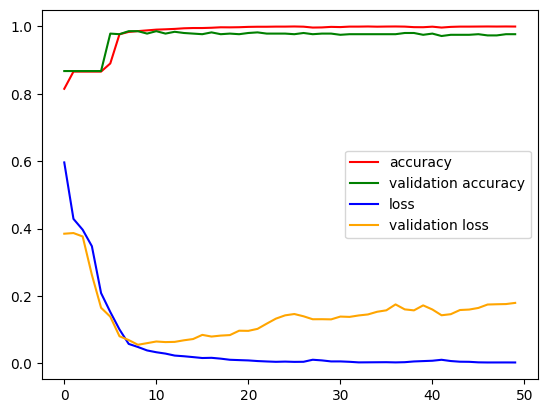

In [22]:
import matplotlib.pyplot as plt
plt.plot(acc,color="red",label="accuracy")
plt.plot(acc_val,color="green",label="validation accuracy")
plt.plot(loss,color="blue",label="loss")
plt.plot(loss_val,color="orange",label="validation loss")
plt.legend()
plt.show()

# History

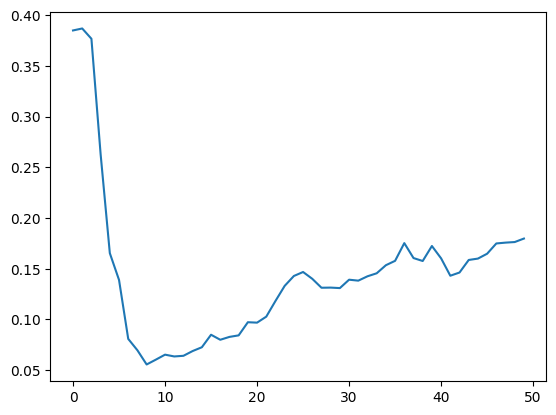

In [27]:
plt.plot(hist.history['val_loss'])
plt.show()